# DBSCAN 算法
流程
定义参数：定义邻域半径ε、最小点数MinPts。
标记核心点：对于每个数据点，计算其ε邻域内的点数，如果点数大于等于MinPts，则将该数据点标记为核心点。
标记边界点和噪声点：对于非核心点，如果其ε邻域内包含核心点，则将其标记为边界点；否则，将其标记为噪声点。
构建簇：从一个核心点开始，将其ε邻域内的所有核心点和边界点加入到同一个簇中，重复此过程，直到所有核心点都被分配到某个簇中。

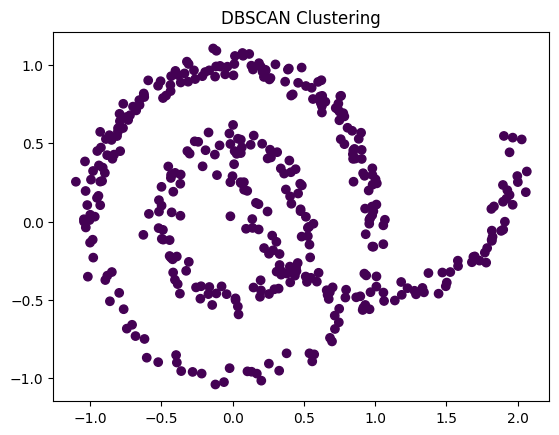

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 生成半月形数据
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=42)

# 生成环形簇数据
def make_circles(n_samples=100, noise=0.05, factor=0.5):
    n_in = int(n_samples * factor)
    n_out = n_samples - n_in
    radius_in = 0.5
    radius_out = 1.0

    # 内圈数据
    t = np.linspace(0, 2 * np.pi, n_in)
    x_in = radius_in * np.cos(t) + np.random.normal(0, noise, n_in)
    y_in = radius_in * np.sin(t) + np.random.normal(0, noise, n_in)
    in_points = np.array([x_in, y_in]).T

    # 外圈数据
    t = np.linspace(0, 2 * np.pi, n_out)
    x_out = radius_out * np.cos(t) + np.random.normal(0, noise, n_out)
    y_out = radius_out * np.sin(t) + np.random.normal(0, noise, n_out)
    out_points = np.array([x_out, y_out]).T

    return np.concatenate([in_points, out_points], axis=0)

X_circles = make_circles(n_samples=200, noise=0.05, factor=0.5)

# 合并两种数据
X = np.concatenate([X_moons, X_circles], axis=0)

# 运行 DBSCAN 算法
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

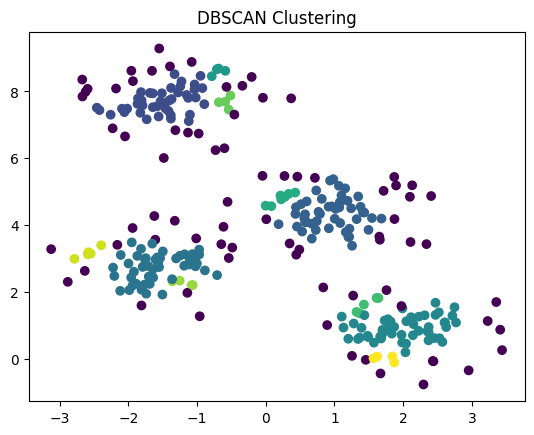

In [9]:
# 手动实现dbscan算法

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 生成示例数据
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

def find_neighbors(X, point, eps):
    return [i for i, p in enumerate(X) if euclidean_distance(p, point) <= eps]

def dbscan(X, eps=0.3, min_samples=5):
    labels = np.full(X.shape[0], -1)  # -1 表示未分类
    cluster_id = 0
    for i in range(X.shape[0]): # 遍历每个点
        if labels[i] != -1:  
            continue    # 跳过已分类的点
        neighbors = find_neighbors(X, X[i], eps)        # 找到该点的邻域
        if len(neighbors) < min_samples:             # 邻域点数小于最小值
            labels[i] = -2  # 标记为噪声点
            continue
        cluster_id += 1                            # 标记为新的簇
        labels[i] = cluster_id                      # 标记为核心点
        seed_set = set(neighbors) - {i}          
        # 遍历邻居点
        while seed_set:                            
            j = seed_set.pop()                     
            if labels[j] == -2:                    
                labels[j] = cluster_id              
            if labels[j] != -1:                    # 跳过已分类的点
                continue                           
            labels[j] = cluster_id                  # 标记为核心点
            new_neighbors = find_neighbors(X, X[j], eps)    # 找到该点的邻域
            if len(new_neighbors) >= min_samples:
                seed_set.update(new_neighbors)        # 将该点的邻域点加入集合
    return labels

# 运行 DBSCAN 算法
labels = dbscan(X)

# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()